In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os
%matplotlib inline

In [2]:
path = "C:/Windows/Fonts/나눔고딕Bold.ttf"
font_name = fm.FontProperties(fname=path,size=18).get_name()
print(font_name)
plt.rc('font',family=font_name)

NanumGothic


In [3]:
data_path = os.path.abspath("../Data/Data")
data_path

'C:\\Users\\김동현\\Desktop\\2020\\2020 하계방학\\Data\\Data'

SNS 데이터를 제외하고 파일로드 자동화

In [4]:
def sep(name):
    if name == 'SNS':
        return ''
    elif name == 'Card':
        return '\t'
    elif name == 'Logistics':
        return ' '
    elif name == 'People':
        return '|'
    elif name == 'Delivery':
        return ' '
    elif name == 'Corona':
        return ','
    

In [5]:
Data = {}
for path in os.listdir(data_path):
    datas  = os.listdir(data_path+"\\"+path)
    data_ex = []
    print(path,":")
    if path not in Data:
        Data[path] = []
    for data in datas:
        data_ex.append(data)
        print(data_path+path+"\\"+data)

        if data[-4:] == 'xlsx':
            if path == 'Delivery':
                for i in range(6):
                    Data[path].append(pd.read_excel(data_path+"\\"+path+"\\"+data,sheet_name=i))
            else:
                Data[path].append(pd.read_excel(data_path+"\\"+path+"\\"+data))
        else:
            try:
                Data[path].append(pd.read_csv(data_path+"\\"+path+"\\"+data,encoding='cp949',engine='python',sep=sep(path)))
            except Exception as e:
                Data[path].append(pd.read_csv(data_path+"\\"+path+"\\"+data,encoding='utf-8',engine='python',sep=sep(path)))
    Data[path].append(data_ex)


Card :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\02_혁신아이디어분야_카드소비데이터(신한카드)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\CARD_SPENDING_FOREIGNER.txt
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCard\CARD_SPENDING_RESIDENT.txt
Corona :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCorona\kr_daily.csv
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataCorona\kr_regional_daily.csv
Delivery :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataDelivery\04_혁신아이디어분야_유통데이터(GS리테일)_데이터정의서 및 문제 데이터.xlsx
Logistics :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataLogistics\05_혁신아이디어분야_물류데이터(CJ올리브네트웍스)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataLogistics\2020 빅콘테스트_CJ올리브네트웍스_제공DB.xlsx
People :
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\01_혁신아이디어분야_유동인구데이터(SK텔레콤)_데이터정의서.xlsx
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\4개지역_FLOW_AGE_201902.CSV
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\DataPeople\4개지역_FLOW_AGE_201903.CSV
C:\Users\김동현\Desktop\2020\2020 하계방학\Data\Da

In [9]:
Card = Data['Card'][2] 
Card

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT
0,20190201,110,517,10,F,25,11,595
1,20190201,110,517,10,F,50,5,243
2,20190201,110,517,10,F,55,5,27
3,20190201,110,517,10,M,20,11,243
4,20190201,110,517,10,M,25,11,433
...,...,...,...,...,...,...,...,...
2537748,20200531,350,720,81,M,45,19,127
2537749,20200531,350,720,81,M,50,33,211
2537750,20200531,350,720,81,M,55,9,61
2537751,20200531,350,720,81,M,60,19,194


In [10]:
test = Card.groupby(["MCT_CAT_CD","STD_DD"]).sum()[["USE_CNT","USE_AMT"]].reset_index()

In [11]:
cors = Data['Corona'][1]
cors.head()

,date,region,confirmed,death,released
0,20200217,서울,14,0,3
1,20200217,부산,0,0,0
2,20200217,대구,0,0,0
3,20200217,인천,1,0,1
4,20200217,광주,2,0,0


In [12]:
cors_seoul = cors.loc[cors['region']=='서울'].reset_index(drop=True)
cors_degu = cors.loc[cors['region']=='대구'].reset_index(drop=True)

In [13]:
cors_seoul['STD_DD'] = cors_seoul['date']
cors_degu['STD_DD'] = cors_degu['date']

In [14]:
a = cors_seoul[:]
b = cors_degu[:]
a.index = a.index+1
b.index = b.index+1

In [15]:
cors_day_seoul = cors_seoul[cors_seoul.columns[2:5]] - a[a.columns[2:5]]
cors_day_seoul.iloc[0] = cors_seoul[cors_seoul.columns[2:5]].iloc[0]
cors_day_degu = cors_degu[cors_degu.columns[2:5]] - b[b.columns[2:5]]
cors_day_degu.iloc[0] = cors_degu[cors_degu.columns[2:5]].iloc[0]

In [16]:
cors_day_seoul = cors_day_seoul[:105]
cors_day_degu = cors_day_degu[:105]

In [17]:
cors_day_seoul['STD_DD'] = cors_seoul[:105]['STD_DD']
cors_day_degu['STD_DD'] = cors_degu[:105]['STD_DD']

In [18]:
temp = Card.loc[(Card['GU_CD']==140)|(Card['GU_CD']==350)].groupby(['STD_DD','MCT_CAT_CD']).sum().reset_index()

In [19]:
t_20 = temp.loc[temp['STD_DD']>20200000][['MCT_CAT_CD','USE_CNT','USE_AMT']]
t_19 = temp.loc[temp['STD_DD']<20200000][['MCT_CAT_CD','USE_CNT','USE_AMT']]

In [20]:
t_20['M'] = temp.loc[temp['STD_DD']>20200000]['STD_DD'].apply(lambda x : x%10000)
t_19['M'] = temp.loc[temp['STD_DD']<20200000]['STD_DD'].apply(lambda x : x%10000)

In [21]:
temp = pd.merge(t_20,t_19,on=['M',"MCT_CAT_CD"])

In [22]:
temp.rename({"USE_CNT_x":"USE_CNT_2020","USE_AMT_x":"USE_AMT_2020","USE_CNT_y":"USE_CNT_2019","USE_AMT_y":"USE_AMT_2019"},inplace=True,axis=1)

In [23]:
temp['DELTA_CNT'] = temp['USE_CNT_2020']-temp['USE_CNT_2019']
temp['DELTA_AMT'] = temp['USE_AMT_2020']-temp['USE_AMT_2019']

작년보다 매출이 가장 많이 떨어진 업종을 찾아야한다.

In [27]:
temp

,MCT_CAT_CD,USE_CNT_2020,USE_AMT_2020,M,USE_CNT_2019,USE_AMT_2019,DELTA_CNT,DELTA_AMT
0,10,3292,502255,201,3481,321888,-189,180367
1,20,8886,712649,201,7996,656491,890,56158
2,21,21906,332995,201,18604,367865,3302,-34870
3,22,3833,78023,201,4743,93344,-910,-15321
4,30,117,61331,201,59,10706,58,50625
...,...,...,...,...,...,...,...,...
2734,70,10884,414896,531,59937,4190037,-49053,-3775141
2735,71,11701,545042,531,13846,1003778,-2145,-458736
2736,80,361986,4869571,531,455374,6225775,-93388,-1356204
2737,81,22810,366045,531,34900,639781,-12090,-273736


In [24]:
temp.groupby("MCT_CAT_CD").sum()["DELTA_CNT"]

MCT_CAT_CD
10    -101958
20    -234971
21    -203531
22    -185477
30      -1405
31        890
32       2189
33    -287217
34     -14728
35     -27682
40   -6325350
42    -467773
43      -2880
44    -140881
50    -459484
52    -911842
60       1237
62    -531825
70     304159
71    -600420
80   -5315880
81    -203775
92      -8941
Name: DELTA_CNT, dtype: int64

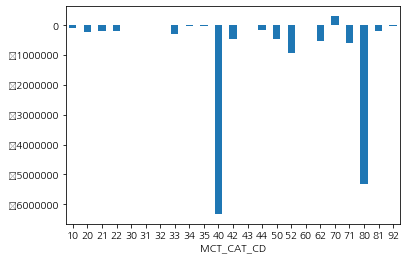

In [28]:
temp.groupby("MCT_CAT_CD").sum()["DELTA_CNT"].plot(kind='bar',rot=0)

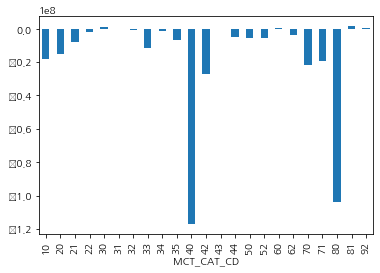

In [26]:
temp.groupby("MCT_CAT_CD").sum()["DELTA_AMT"].plot(kind='bar')

In [29]:
temp.reset_index(drop=True, inplace=True)

In [30]:
temp['DELTA_%_CNT'] = (temp['DELTA_CNT']/temp['USE_CNT_2020'])*100
temp['DELTA_%_AMT'] = (temp['DELTA_AMT']/temp['USE_AMT_2020'])*100

In [31]:
temp

,MCT_CAT_CD,USE_CNT_2020,USE_AMT_2020,M,USE_CNT_2019,USE_AMT_2019,DELTA_CNT,DELTA_AMT,DELTA_%_CNT,DELTA_%_AMT
0,10,3292,502255,201,3481,321888,-189,180367,-5.741191,35.911439
1,20,8886,712649,201,7996,656491,890,56158,10.015755,7.880177
2,21,21906,332995,201,18604,367865,3302,-34870,15.073496,-10.471629
3,22,3833,78023,201,4743,93344,-910,-15321,-23.741195,-19.636517
4,30,117,61331,201,59,10706,58,50625,49.572650,82.543901
...,...,...,...,...,...,...,...,...,...,...
2734,70,10884,414896,531,59937,4190037,-49053,-3775141,-450.689085,-909.900553
2735,71,11701,545042,531,13846,1003778,-2145,-458736,-18.331767,-84.165257
2736,80,361986,4869571,531,455374,6225775,-93388,-1356204,-25.798788,-27.850585
2737,81,22810,366045,531,34900,639781,-12090,-273736,-53.003069,-74.782062


In [32]:
seoul = pd.merge(Card.loc[(Card['GU_CD']==140)|(Card['GU_CD']==350)].groupby(['STD_DD','MCT_CAT_CD']).sum().reset_index(),cors_day_seoul,on='STD_DD')
degu = pd.merge(Card.loc[(Card['GU_CD']==260)|(Card['GU_CD']==110)].groupby('STD_DD').sum().reset_index(),cors_day_degu,on='STD_DD')

In [33]:
se = pd.merge(Card.loc[(Card['GU_CD']==140)|(Card['GU_CD']==350)],cors_day_seoul,on='STD_DD')
de = pd.merge(Card.loc[(Card['GU_CD']==260)|(Card['GU_CD']==110)],cors_day_degu,on='STD_DD')

In [34]:
indexing = {10: '숙박',
 20: '레저용품',
 21: '레저업소',
 22: '문화취미',
 30: '가구',
 31: '전기',
 32: '주방용구',
 33: '연료판매',
 34: '광학제품',
 35: '가전',
 40: '유통업',
 42: '의복',
 43: '직물',
 44: '신변잡화',
 50: '서적문구',
 52: '사무통신',
 60: '자동차판매',
 62: '자동차정비',
 70: '의료기관',
 71: '보건위생',
 80: '요식업소',
 81: '음료식품',
 92: '수리서비스'}

In [35]:
print("업종수: ",len(indexing))

업종수:  23


In [36]:
def plot_delta_cnt(graph,code):
    graph = graph.loc[graph['MCT_CAT_CD']==code].reset_index(drop=True)
    plt.bar(graph.index,graph['DELTA_CNT'],label=indexing[code])
    plt.xlabel("0217-0531")
    plt.ylabel("2020사용량-2019사용량")

In [37]:
def plot_delta_cnt_ratio(graph,code):
    graph = graph.loc[graph['MCT_CAT_CD']==code].reset_index(drop=True)
    plt.bar(graph.index,graph['DELTA_%_CNT'],label=indexing[code])
    plt.xlabel("0217-0531")
    plt.ylabel("2020사용량-2019사용량_%")

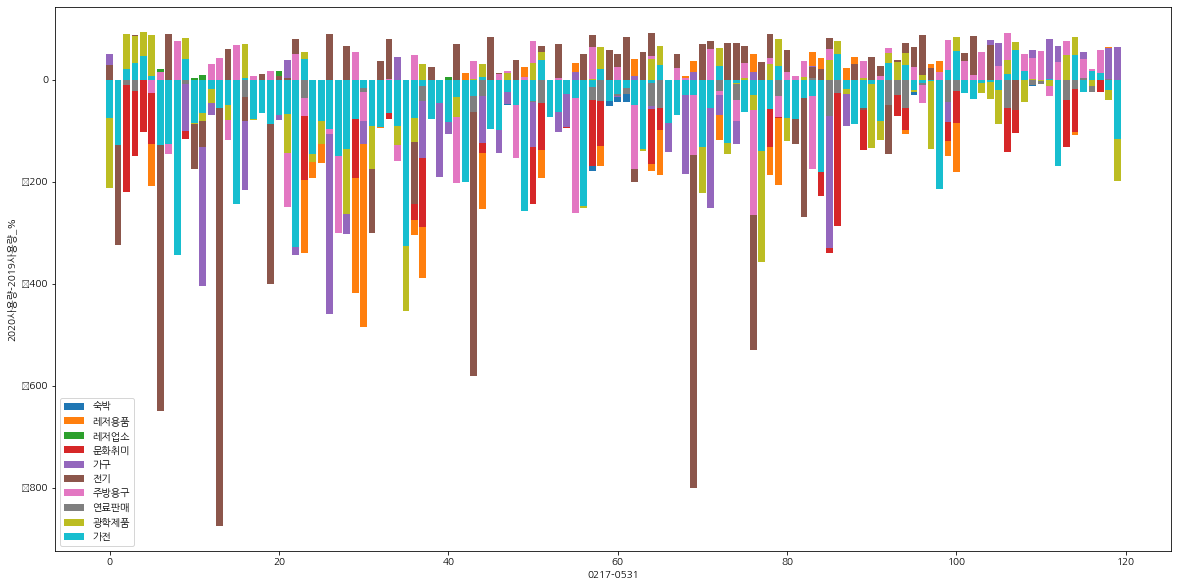

In [38]:
plt.figure(figsize=(20,10))
for index in list(indexing.keys())[:10]:
    plot_delta_cnt_ratio(temp,index)

plt.legend()

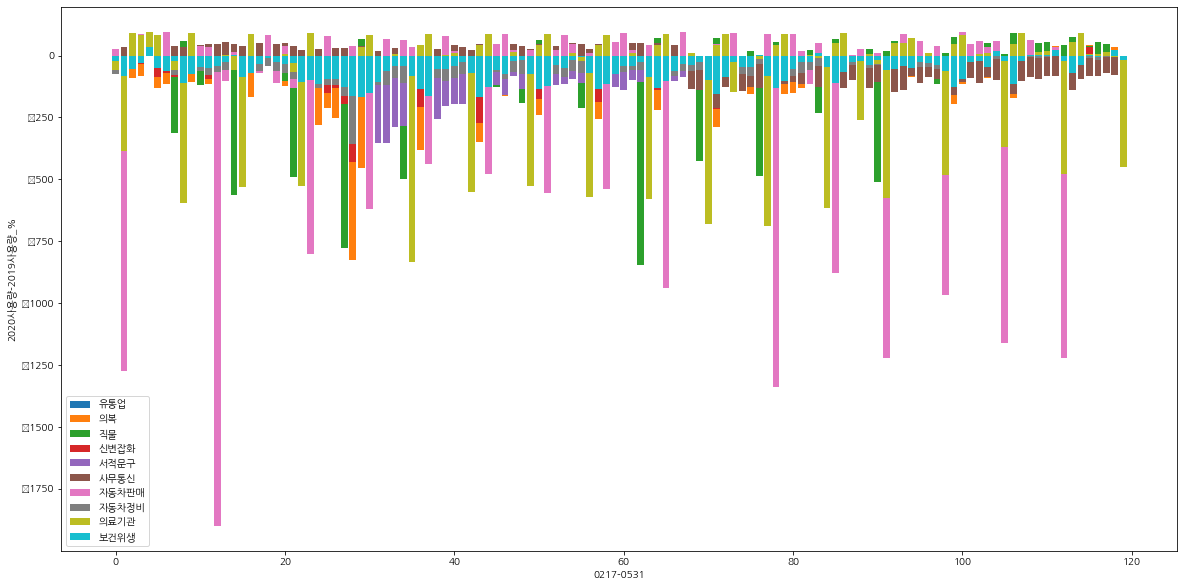

In [39]:
plt.figure(figsize=(20,10))
for index in list(indexing.keys())[10:20]:
    plot_delta_cnt_ratio(temp,index)

plt.legend()
    


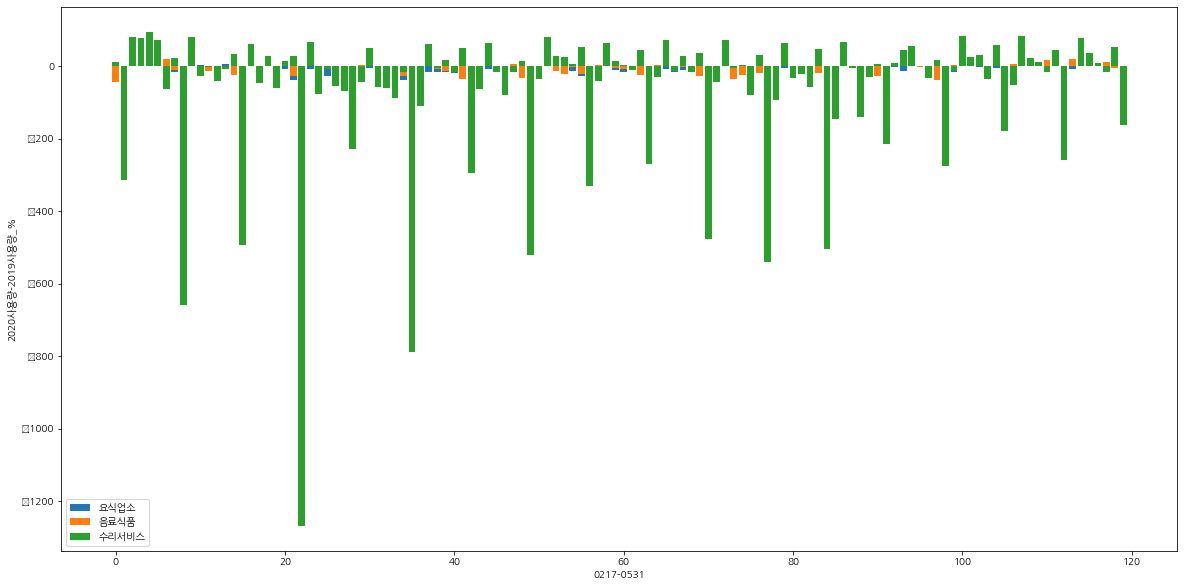

In [40]:
plt.figure(figsize=(20,10))
for index in list(indexing.keys())[20:]:
    plot_delta_cnt_ratio(temp,index)

plt.legend()
    


데이터 피쳐 정의부

In [41]:
se_d = se.drop("MCT_CAT_CD",axis=1) 

In [42]:
se_d['SEX_CD'] = se_d['SEX_CD'].apply(lambda x: 0 if x=='F' else 1)

In [43]:
temp['DELTA_%_CNT'] = temp['DELTA_%_CNT'].apply(np.round).astype(np.int8)
temp['DELTA_%_AMT'] = temp['DELTA_%_AMT'].apply(np.round).astype(np.int8)
temp

,MCT_CAT_CD,USE_CNT_2020,USE_AMT_2020,M,USE_CNT_2019,USE_AMT_2019,DELTA_CNT,DELTA_AMT,DELTA_%_CNT,DELTA_%_AMT
0,10,3292,502255,201,3481,321888,-189,180367,-6,36
1,20,8886,712649,201,7996,656491,890,56158,10,8
2,21,21906,332995,201,18604,367865,3302,-34870,15,-10
3,22,3833,78023,201,4743,93344,-910,-15321,-24,-20
4,30,117,61331,201,59,10706,58,50625,50,83
...,...,...,...,...,...,...,...,...,...,...
2734,70,10884,414896,531,59937,4190037,-49053,-3775141,61,114
2735,71,11701,545042,531,13846,1003778,-2145,-458736,-18,-84
2736,80,361986,4869571,531,455374,6225775,-93388,-1356204,-26,-28
2737,81,22810,366045,531,34900,639781,-12090,-273736,-53,-75


In [65]:
X, y = [temp[['DELTA_%_CNT','DELTA_%_AMT']],temp['MCT_CAT_CD']]

모델 테스트

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
RF = RandomForestClassifier(n_estimators=100,random_state=10).fit(X_train,y_train)
print("RandomForest")
print("훈련 세트 정확도: {:.3f}".format(RF.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(RF.score(X_test,y_test)))

RandomForest
훈련 세트 정확도: 0.959
테스트 세트 정확도: 0.106


In [48]:
from sklearn.linear_model import Ridge

In [49]:
ridge = Ridge(alpha=0.001).fit(X_train,y_train)
print("Ridge")
print("훈련 세트 정확도: {:.3f}".format(ridge.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(ridge.score(X_test,y_test)))

Ridge
훈련 세트 정확도: 0.001
테스트 세트 정확도: 0.003


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
Log = LogisticRegression().fit(X_train,y_train)
print("LogisticRegression")
print("훈련 세트 정확도: {:.3f}".format(Log.score(X_train,y_train)))
print("테스트 세트 정확도: {:.3f}".format(Log.score(X_test,y_test)))

LogisticRegression
훈련 세트 정확도: 0.113
테스트 세트 정확도: 0.088
